In [118]:
#Assumption 1:  find  10 locations for teams to go ? which day of the week is better? 
#Assumption 2: the team would stay in the same place for the entire day ,they will not travel ard.
#Assumption 3: Same station will have most likely have the same ppl everyday... no need to return to that station.


In [1]:
import pandas as pd

In [2]:
import numpy as np
import datetime 

In [3]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200829,200822,200815,200808,200801]
turnstiles_df = get_data(week_nums)

In [4]:
turnstiles_df.info() #217832 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048190 entries, 0 to 206703
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1048190 non-null  object
 1   UNIT                                                                  1048190 non-null  object
 2   SCP                                                                   1048190 non-null  object
 3   STATION                                                               1048190 non-null  object
 4   LINENAME                                                              1048190 non-null  object
 5   DIVISION                                                              1048190 non-null  object
 6   DATE                                                                  1048190 non-n

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276


In [6]:
from datetime import datetime as dt
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [7]:
turnstiles_df['Day_Week'] = turnstiles_df["DATE_TIME"].dt.day_name()

In [8]:
#df["MID"]= df["STATION"] +" " + df["SCP"] +" " +df ["UNIT"]

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191,2020-08-22 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197,2020-08-22 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208,2020-08-22 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248,2020-08-22 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276,2020-08-22 16:00:00,Saturday


In [10]:
turnstiles_df.sort_values(by=['STATION','UNIT','SCP','DATE','TIME'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week
32210,H007,R248,00-00-00,1 AV,L,BMT,07/25/2020,00:00:00,REGULAR,15459169,17334477,2020-07-25 00:00:00,Saturday
32211,H007,R248,00-00-00,1 AV,L,BMT,07/25/2020,04:00:00,REGULAR,15459170,17334498,2020-07-25 04:00:00,Saturday
32212,H007,R248,00-00-00,1 AV,L,BMT,07/25/2020,08:00:00,REGULAR,15459176,17334615,2020-07-25 08:00:00,Saturday
32213,H007,R248,00-00-00,1 AV,L,BMT,07/25/2020,12:00:00,REGULAR,15459196,17334845,2020-07-25 12:00:00,Saturday
32214,H007,R248,00-00-00,1 AV,L,BMT,07/25/2020,16:00:00,REGULAR,15459236,17335149,2020-07-25 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191298,R419,R326,00-05-01,ZEREGA AV,6,IRT,08/28/2020,05:00:00,REGULAR,39,167,2020-08-28 05:00:00,Friday
191299,R419,R326,00-05-01,ZEREGA AV,6,IRT,08/28/2020,09:00:00,REGULAR,39,167,2020-08-28 09:00:00,Friday
191300,R419,R326,00-05-01,ZEREGA AV,6,IRT,08/28/2020,13:00:00,REGULAR,39,167,2020-08-28 13:00:00,Friday
191301,R419,R326,00-05-01,ZEREGA AV,6,IRT,08/28/2020,17:00:00,REGULAR,39,167,2020-08-28 17:00:00,Friday


In [11]:
turnstiles_df["entry change"]=turnstiles_df.ENTRIES.diff()

In [12]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191,2020-08-22 00:00:00,Saturday,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197,2020-08-22 04:00:00,Saturday,2.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208,2020-08-22 08:00:00,Saturday,12.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248,2020-08-22 12:00:00,Saturday,28.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276,2020-08-22 16:00:00,Saturday,85.0


In [13]:
turnstiles_df = turnstiles_df.rename(columns = {'EXITS                                                               ': 'EXITS'})

In [14]:
turnstiles_df["exit change"]=turnstiles_df.EXITS.diff()

In [15]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191,2020-08-22 00:00:00,Saturday,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197,2020-08-22 04:00:00,Saturday,2.0,6.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208,2020-08-22 08:00:00,Saturday,12.0,11.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248,2020-08-22 12:00:00,Saturday,28.0,40.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276,2020-08-22 16:00:00,Saturday,85.0,28.0


In [16]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
206699,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,12:59:32,REGULAR,5554,538,2020-07-31 12:59:32,Friday,0.0,0.0
206700,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,13:00:00,REGULAR,5554,538,2020-07-31 13:00:00,Friday,0.0,0.0
206701,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,13:11:06,REGULAR,5554,538,2020-07-31 13:11:06,Friday,0.0,0.0
206702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,17:00:00,REGULAR,5554,538,2020-07-31 17:00:00,Friday,0.0,0.0
206703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,21:00:00,REGULAR,5554,538,2020-07-31 21:00:00,Friday,0.0,0.0


In [17]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,UNIT,SCP,STATION,DATE_TIME,ENTRIES
641004,R235,00-06-01,BEDFORD AV,2020-08-13 04:00:00,2
641286,R235,00-06-03,BEDFORD AV,2020-08-13 00:00:00,2
640998,R235,00-06-01,BEDFORD AV,2020-08-12 16:00:00,2
640809,R235,00-06-00,BEDFORD AV,2020-08-12 12:00:00,2
640810,R235,00-06-00,BEDFORD AV,2020-08-12 16:00:00,2


In [18]:
mask = ((turnstiles_df["C/A"] == "N333A") & 
(turnstiles_df["UNIT"] == "R141") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "FOREST HILLS 71") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 8, 26).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
87780,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,01:00:00,REGULAR,1443526,2955419,2020-08-26 01:00:00,Wednesday,13.0,12.0
87781,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,05:00:00,REGULAR,1443526,2955420,2020-08-26 05:00:00,Wednesday,0.0,1.0
87782,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,05:00:00,RECOVR AUD,8,2,2020-08-26 05:00:00,Wednesday,-1443518.0,-2955418.0
87783,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,09:00:00,REGULAR,1443535,2955448,2020-08-26 09:00:00,Wednesday,1443527.0,2955446.0
87784,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,10:00:00,RECOVR AUD,8,82,2020-08-26 10:00:00,Wednesday,-1443527.0,-2955366.0


In [19]:
turnstiles_df.DESC.value_counts()
#to find the no. of Regular  and Recovr AUD (1107 is abt 0.5% of the data set so drop off?)
#looking at the recover AUD  they seems like adjustment made to the entries and exit count 
#so could be added to the entries and exit count to that timing ? 
#but then we no need to add back as the entries and exit count would have adjust itself properly in later time
# we should take note of 

REGULAR       1042139
RECOVR AUD       6051
Name: DESC, dtype: int64

In [20]:
#list of error on the 1st day 22/08 
AUDmask = ((turnstiles_df["DESC"] == "RECOVR AUD") & (turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 8, 22).date()))
turnstiles_df[AUDmask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
2933,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,9748875,12161821,2020-08-22 04:00:00,Saturday,3.0,12.0
2975,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,4058846,4728409,2020-08-22 04:00:00,Saturday,2.0,5.0
3017,A021,R032,01-00-02,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,2855615,2777078,2020-08-22 04:00:00,Saturday,2.0,0.0
3059,A021,R032,01-00-03,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,2833689,1338923,2020-08-22 04:00:00,Saturday,0.0,3.0
3101,A021,R032,01-00-04,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,2536242,3745986,2020-08-22 04:00:00,Saturday,2.0,4.0
3143,A021,R032,01-00-05,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,1927699,6311228,2020-08-22 04:00:00,Saturday,2.0,3.0
3185,A021,R032,01-00-06,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,2205629,6817228,2020-08-22 04:00:00,Saturday,2.0,12.0
3227,A021,R032,01-00-07,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/22/2020,04:00:00,RECOVR AUD,3600650,6148345,2020-08-22 04:00:00,Saturday,2.0,11.0
30171,G001,R151,00-00-01,CONEY IS-STILLW,DFNQ,BMT,08/22/2020,05:00:00,RECOVR AUD,7650714,6604941,2020-08-22 05:00:00,Saturday,5.0,10.0
31747,H001,R175,00-06-02,8 AV,ACEL,BMT,08/22/2020,13:00:00,RECOVR AUD,3133,12285,2020-08-22 13:00:00,Saturday,0.0,53.0


In [21]:
#count of the list
turnstiles_df[AUDmask].count()

C/A             218
UNIT            218
SCP             218
STATION         218
LINENAME        218
DIVISION        218
DATE            218
TIME            218
DESC            218
ENTRIES         218
EXITS           218
DATE_TIME       218
Day_Week        218
entry change    218
exit change     218
dtype: int64

In [22]:
AUDmask = ((turnstiles_df["DESC"] == "RECOVR AUD") & (turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 8, 28).date()))
turnstiles_df[AUDmask].head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
11116,A060,R001,00-00-03,WHITEHALL S-FRY,R1W,BMT,08/28/2020,05:00:00,RECOVR AUD,2989066,501574,2020-08-28 05:00:00,Friday,0.0,0.0
24624,C027,R216,00-00-00,BAY RIDGE-95 ST,R,BMT,08/28/2020,00:00:00,RECOVR AUD,5283158,7268448,2020-08-28 00:00:00,Friday,9.0,57.0
24666,C027,R216,00-00-01,BAY RIDGE-95 ST,R,BMT,08/28/2020,00:00:00,RECOVR AUD,1292443,1358316,2020-08-28 00:00:00,Friday,11.0,55.0
24708,C027,R216,00-00-02,BAY RIDGE-95 ST,R,BMT,08/28/2020,00:00:00,RECOVR AUD,3172132,3352334,2020-08-28 00:00:00,Friday,6.0,30.0
24750,C027,R216,00-03-00,BAY RIDGE-95 ST,R,BMT,08/28/2020,00:00:00,RECOVR AUD,4061281,4220337,2020-08-28 00:00:00,Friday,5.0,25.0


In [23]:
turnstiles_df[AUDmask].count()

C/A             266
UNIT            266
SCP             266
STATION         266
LINENAME        266
DIVISION        266
DATE            266
TIME            266
DESC            266
ENTRIES         266
EXITS           266
DATE_TIME       266
Day_Week        266
entry change    266
exit change     266
dtype: int64

In [24]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [25]:
# Sanity Check to verify that "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,R001,00-00-00,WHITEHALL S-FRY,2020-07-25 01:00:00,1
698785,R268,00-06-00,METROPOLITAN AV,2020-08-04 09:00:00,1
698772,R268,00-06-00,METROPOLITAN AV,2020-08-02 05:00:00,1
698773,R268,00-06-00,METROPOLITAN AV,2020-08-02 09:00:00,1
698774,R268,00-06-00,METROPOLITAN AV,2020-08-02 13:00:00,1


In [26]:
turnstiles_df['traffic by diff'] = turnstiles_df['entry change'] + turnstiles_df['exit change']

In [27]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change,traffic by diff
125080,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,08/28/2020,21:00:00,REGULAR,1503701,494373,2020-08-28 21:00:00,Friday,78.0,32.0,110.0
125079,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,08/28/2020,17:00:00,REGULAR,1503623,494341,2020-08-28 17:00:00,Friday,109.0,27.0,136.0
125078,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,08/28/2020,13:00:00,REGULAR,1503514,494314,2020-08-28 13:00:00,Friday,68.0,27.0,95.0
125077,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,08/28/2020,09:00:00,REGULAR,1503446,494287,2020-08-28 09:00:00,Friday,72.0,40.0,112.0
125076,N702A,R572,01-03-04,96 ST-2 AVE,Q,IND,08/28/2020,05:00:00,REGULAR,1503374,494247,2020-08-28 05:00:00,Friday,0.0,6.0,6.0


In [41]:
turnstiles_df.groupby(['STATION','UNIT','SCP', 'DATE'])[['traffic by diff']].sum()

traffic by diff
STATION   UNIT SCP      DATE                       
1 AV      R248 00-00-00 07/25/2020       19729317.0
                        07/26/2020            903.0
                        07/27/2020           1498.0
                        07/28/2020           1593.0
                        07/29/2020           1733.0
...                                             ...
ZEREGA AV R326 00-05-01 08/24/2020              0.0
                        08/25/2020              2.0
                        08/26/2020              0.0
                        08/27/2020              0.0
                        08/28/2020              0.0

[172494 rows x 1 columns]

In [42]:
turnstiles_df.groupby(['STATION','UNIT','SCP','DATE'])['ENTRIES'].max()

STATION    UNIT  SCP       DATE      
1 AV       R248  00-00-00  07/25/2020    15459283
                           07/26/2020    15459384
                           07/27/2020    15459623
                           07/28/2020    15459851
                           07/29/2020    15460143
                                           ...   
ZEREGA AV  R326  00-05-01  08/24/2020          39
                           08/25/2020          39
                           08/26/2020          39
                           08/27/2020          39
                           08/28/2020          39
Name: ENTRIES, Length: 172494, dtype: int64

In [43]:
#turnstiles_df.groupby(['STATION','UNIT','SCP'])['ENTRIES'].min()

In [44]:
#df.groupby(['STATION','MID'])['EXITS'].max()

In [45]:
#df.groupby(['STATION','MID'])['EXITS'].min()

In [46]:
#df.groupby(['STATION','MID', 'DATE'])[['total ppl']].sum().head(20)

In [47]:
#df.groupby(['STATION','MID'])['ENTRIES'].max() - df.groupby(['STATION','MID'])['ENTRIES'].min()

In [48]:
#df.groupby(['STATION','MID'])['EXITS'].max() - df.groupby(['STATION','MID'])['EXITS'].min()

In [81]:
#since the count on the turnstiles is culmulative 
#we can get the max value - min value of each turnsiles for each day to get the daily count
#then add daily entries + exit to get the total human traffic
DTraffic_max_min = turnstiles_df.groupby(['STATION','UNIT','SCP','DATE','Day_Week'])['ENTRIES'].max() - turnstiles_df.groupby(['STATION','UNIT', 'SCP','DATE','Day_Week'])['ENTRIES'].min() + turnstiles_df.groupby(['STATION','UNIT','SCP','DATE','Day_Week'])['EXITS'].max() - turnstiles_df.groupby(['STATION','UNIT','SCP','DATE','Day_Week'])['EXITS'].min()

In [82]:
DTraffic_df =DTraffic_max_min.reset_index()


In [83]:
DTraffic_df.columns

Index(['STATION', 'UNIT', 'SCP', 'DATE', 'Day_Week', 0], dtype='object')

In [84]:
DTraffic_df = DTraffic_df.rename(columns = {0: 'Traffic'}) #rename 0 to traffic 

In [85]:
DTraffic_df.head() 

,STATION,UNIT,SCP,DATE,Day_Week,Traffic
0,1 AV,R248,00-00-00,07/25/2020,Saturday,1020
1,1 AV,R248,00-00-00,07/26/2020,Sunday,736
2,1 AV,R248,00-00-00,07/27/2020,Monday,1361
3,1 AV,R248,00-00-00,07/28/2020,Tuesday,1484
4,1 AV,R248,00-00-00,07/29/2020,Wednesday,1604


In [87]:
#(turnstiles_df
# .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
# .ENTRIES.count()
# .reset_index()
# .sort_values("ENTRIES", ascending=False)).head(5)
DTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(50)

,STATION,UNIT,SCP,DATE,Day_Week,Traffic
170511,WORLD TRADE CTR,R029,01-03-00,08/07/2020,Friday,1879048283
170739,WORLD TRADE CTR,R029,01-03-06,08/25/2020,Tuesday,1549702036
170709,WORLD TRADE CTR,R029,01-03-06,07/26/2020,Sunday,1549697830
170373,WORLD TRADE CTR,R029,01-00-01,08/09/2020,Sunday,1070315453
170705,WORLD TRADE CTR,R029,01-03-05,08/26/2020,Wednesday,1057535892
75301,BEDFORD AV,R235,00-03-00,08/13/2020,Thursday,34316436
122946,JAMAICA CENTER,R025,00-00-02,08/08/2020,Saturday,33754069
95987,CRESCENT ST,R437,00-00-02,08/12/2020,Wednesday,20984977
65586,AQUEDUCT N.COND,R357,00-06-01,07/25/2020,Saturday,17615034
105844,FOREST HILLS 71,R141,02-00-01,08/26/2020,Wednesday,16723105


In [88]:
#noticed after a list of of huge traffice over 10k there are traffic of turnstile at 42 ST-PORT AUTH are abt the same.
#we will use 10,000 as the cut off for outlier and replace them with NaN
#we should replace these Stations with NaN with their station daily mean.

In [89]:
#DTraffic_df.loc[:, (Dtraffic_df['Traffic']>=10000)] = np.nan
DTraffic_df['Traffic'].mask(DTraffic_df['Traffic'].between(10000,1879048283 ), inplace=True)

In [90]:
DTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(20)

,STATION,UNIT,SCP,DATE,Day_Week,Traffic
36562,42 ST-PORT AUTH,R011,00-00-00,08/05/2020,Wednesday,5240.0
36583,42 ST-PORT AUTH,R011,00-00-00,08/26/2020,Wednesday,5140.0
36577,42 ST-PORT AUTH,R011,00-00-00,08/20/2020,Thursday,5116.0
36564,42 ST-PORT AUTH,R011,00-00-00,08/07/2020,Friday,5066.0
36576,42 ST-PORT AUTH,R011,00-00-00,08/19/2020,Wednesday,5033.0
36585,42 ST-PORT AUTH,R011,00-00-00,08/28/2020,Friday,5024.0
36563,42 ST-PORT AUTH,R011,00-00-00,08/06/2020,Thursday,5023.0
36578,42 ST-PORT AUTH,R011,00-00-00,08/21/2020,Friday,4965.0
36560,42 ST-PORT AUTH,R011,00-00-00,08/03/2020,Monday,4963.0
36582,42 ST-PORT AUTH,R011,00-00-00,08/25/2020,Tuesday,4954.0


In [91]:
# groupby station
STraffic =DTraffic_df.groupby(['Day_Week','STATION'])['Traffic'].sum()

In [92]:
STraffic_df = STraffic.reset_index()
STraffic_df.head() 

,Day_Week,STATION,Traffic
0,Friday,1 AV,53986.0
1,Friday,103 ST,75513.0
2,Friday,103 ST-CORONA,71322.0
3,Friday,104 ST,10794.0
4,Friday,110 ST,32861.0


In [93]:
#STraffic_df.sort_values(by=['Day_Week', 'Traffic'],ascending=False)
#STraffic_df.query()
#STraffic_df.to_csv("dailystntraffic.csv")

In [94]:
#STraffic_df.groupby(['Day_Week', 'Station']).value_counts().nlargest(5)
##STraffic_df['Traffic'].groupby(STraffic_df['Day_Week']).value_counts().head(10)
#s = STraffic_df['STATION'].groupby(df['Day_Week']).value_counts()
#print s.groupby(level=[0,1]).nlargest(1)

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Traffic'>

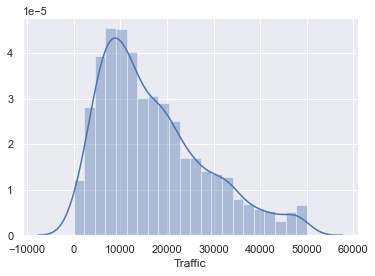

In [96]:
sns.distplot(STraffic_df['Traffic']
             [STraffic_df['Traffic'] < 50000])

<AxesSubplot:xlabel='Day_Week', ylabel='Traffic'>

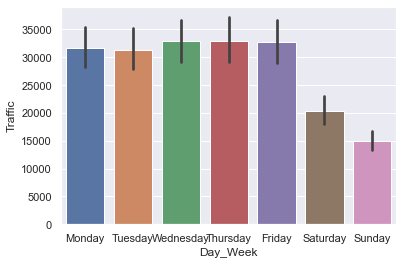

In [97]:
sns.barplot(x = 'Day_Week',y='Traffic',data=STraffic_df,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])


In [98]:
#from above graph, wednesday got the highest vol. in a day so let's find its top stations
#STraffic_df.filter(items =['Wednesday'])
#STraffic_df.sort_values(by = ["Traffic"], ascending=False).head(20)
Wedmask = ((STraffic_df["Day_Week"] == "Wednesday") )
Wedmask.df=STraffic_df[Wedmask].sort_values(by = ["Traffic"], ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, '34 ST-HERALD SQ'),
  Text(2, 0, '125 ST'),
  Text(3, 0, '86 ST'),
  Text(4, 0, 'GRD CNTRL-42 ST'),
  Text(5, 0, '14 ST-UNION SQ'),
  Text(6, 0, '42 ST-PORT AUTH'),
  Text(7, 0, '23 ST'),
  Text(8, 0, 'FULTON ST'),
  Text(9, 0, '59 ST')])

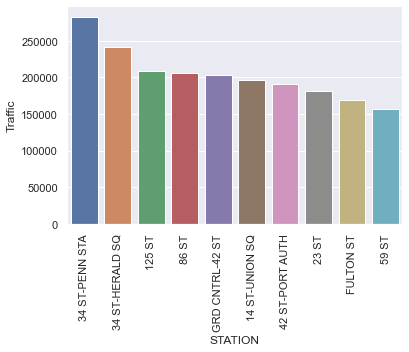

In [75]:
sns.barplot(x = 'STATION',y='Traffic',data=Wedmask.df)
plt.xticks(rotation='vertical')

In [76]:
Satmask = ((STraffic_df["Day_Week"] == "Saturday") )
STraffic_df[Satmask].sort_values(by = ["Traffic"], ascending=False).head(10)

,Day_Week,STATION,Traffic
819,Saturday,34 ST-PENN STA,170601.0
767,Saturday,125 ST,151655.0
817,Saturday,34 ST-HERALD SQ,149490.0
772,Saturday,14 ST-UNION SQ,135460.0
826,Saturday,42 ST-PORT AUTH,115056.0
868,Saturday,86 ST,112976.0
975,Saturday,FLUSHING-MAIN,106939.0
1015,Saturday,JKSN HT-ROOSVLT,106234.0
991,Saturday,GRD CNTRL-42 ST,95780.0
804,Saturday,23 ST,93135.0


In [ ]:
#diff in the top 10 , one week data 10th stn "FLUSHING-MAIN" then one mth stn "59 ST"

In [77]:
#map station to map location?
#world trade center stn has outlier - over 1mils - 25 & 26

In [99]:
totalTraffic =DTraffic_df.groupby(['STATION'])['Traffic'].sum()
TotalTraffic_df = totalTraffic.reset_index()
TotalTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(10)

,STATION,Traffic
61,34 ST-PENN STA,1735014.0
59,34 ST-HERALD SQ,1445161.0
9,125 ST,1308301.0
110,86 ST,1194327.0
233,GRD CNTRL-42 ST,1177780.0
14,14 ST-UNION SQ,1166297.0
68,42 ST-PORT AUTH,1160898.0
46,23 ST,1028007.0
226,FULTON ST,966196.0
217,FLUSHING-MAIN,939419.0


In [100]:
#sns.boxplot(x ="STATION", y="Traffic",data=TotalTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(10));
#plt.xticks(rotation='vertical')

In [152]:
#df1.to_csv("dailytraffic.csv")

In [153]:
#df.to_csv("hourlytraffic.csv")